In [1]:
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext("local")
spark = SparkSession.builder.getOrCreate()

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np

# Simple linear regression
Linear regression with only a slope, also known as simple linear regression, is a statistical technique used to model the relationship between a dependent variable and an independent variable when the relationship can be approximated by a straight line. In this case, we are considering a linear regression model with a single predictor variable and no intercept term.

To perform linear regression with only a slope, we need a set of paired observations (x, y), where x represents the independent variable (predictor) and y represents the dependent variable (response). The goal is to estimate the slope of the line that best fits the data points.

The formula for the simple linear regression model is:

$$y = \beta \cdot x + \epsilon$$

where:
- y is the dependent variable
- x is the independent variable
- β is the slope of the line
- ε is the error term representing the random variation or noise in the data

## Generate data

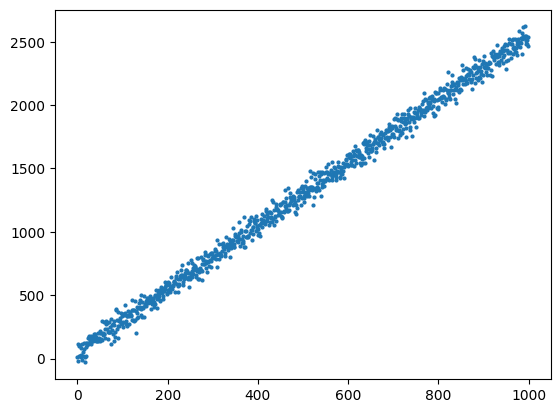

In [3]:
# Let us create some random data
size= 1000
mu, sigma = 50, 50 # mean and standard deviation
error=np.random.normal(mu, sigma, size)
x1 = np.arange(0, size)
y = 2.5*x1 + error
plt.plot(x1, y, 'o', markersize=2)
plt.show()

In [4]:
myRDD = sc.parallelize(zip(y,x1))
myRDD.take(5)

[(9.287310109098179, 0),
 (112.80314876586786, 1),
 (-20.29766879990757, 2),
 (17.852118059696636, 3),
 (100.6751099147994, 4)]

## Calculating the slope using sklearn. 
The fit() method returns an instance of the LinearRegression class, which contains the slope of the line in its coef_ attribute.

In [5]:
from sklearn.linear_model import LinearRegression

X = np.stack([x1], axis=1)
reg = LinearRegression(fit_intercept=False).fit(X, y)
print(reg.coef_)

[2.57806022]


## Calculating the slope using linear algebra.
Calculate the coefficients of a linear regression model using the normal equation approach

$$
\hat{\beta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$

Where:
- $\hat{\beta}$ represents the estimated coefficients of the linear regression model.
- $X$ is the matrix of input variables.
- $X^T$ denotes the transpose of $X$.
- $y$ is the vector of dependent variable values.
- $(X^T \cdot X)^{-1}$ represents the inverse of the matrix product $X^T \cdot X$.

In [6]:
# Let use solve this also with the exact linear algebra solution. 
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(beta_hat)

[2.57806022]


## Calculating the slope using gradient descent
Gradient descent is an iterative optimization algorithm used to find the minimum value of a function. In the context of machine learning, we can use gradient descent to find the optimal values of the coefficients in a parameterized model.

1. Calculation of the prediction with current regression coefficients:
   - Prediction: $y_{\text{prediction}} = m_{\text{current}} \cdot x_1$

2. Computation of the cost (for monitoring purposes):
   - Cost: $cost = \frac{-1}{2n} \sum (y - y_{\text{prediction}})^2$

3. Calculation of the gradient:

$$
\begin{align*}
m_{\text{gradient}} & = \frac{\partial }{\partial m} \left(\frac{-1}{2n} \sum (y - mx)^2 \right) \\
& = \frac{-1}{2n}\sum \frac{\partial }{\partial m} (y - mx)^2 \\
& = \frac{-1}{2n}\sum 2(y - mx)(-x) \\
& = \frac{-1}{n} \sum x(y - mx) \\
\end{align*}
$$

   The final formula for gradient is: $m_{\text{gradient}} = \frac{-1}{n} \sum (x \cdot (y - mx))$

4. Update of the regression coefficient:
   - Updated coefficient: $m_{\text{current}} = m_{\text{current}} - \text{learningRate} \cdot m_{\text{gradient}}$

Here, the variable $n$ represents the number of data points in the dataset, $y$ is the dependent variable, $x_1$ is the independent variable, $m_{\text{current}}$ is the current value of the coefficient, and $\text{learningRate}$ is the learning rate (step size) used in the gradient descent algorithm.

In [7]:
# Now, we do gradient descent here with a very simple numpy array 
learningRate = 0.000001
num_iteration = 30 
m_current=0
n = float(size)

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x1 
    # We compute costs just for monitoring 
    cost= sum (( y - y_prediction)**2)/size
    # calculate gradients. 
    m_gradient = (-1/n) * sum (x1 * (y - y_prediction) )
    print(i , "m=", m_current, " Cost=", cost)
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient 

0 m= 0  Cost= 2215364.9352439092
1 m= 0.8580648056217073  Cost= 987871.5692734236
2 m= 1.4305368987615217  Cost= 441500.59937229287
3 m= 1.8124711014892858  Cost= 198304.79479482037
4 m= 2.067284806753459  Cost= 90055.63328686784
5 m= 2.237287974646589  Cost= 41872.72574233427
6 m= 2.3507083931587607  Cost= 20425.976898238197
7 m= 2.4263786968060614  Cost= 10879.790098352414
8 m= 2.4768633884443685  Cost= 6630.676021399959
9 m= 2.510545083468277  Cost= 4739.348016046897
10 m= 2.5330163820514455  Cost= 3897.4968538869243
11 m= 2.548008479677633  Cost= 3522.779524463244
12 m= 2.558010704978555  Cost= 3355.988667264505
13 m= 2.5646838546247825  Cost= 3281.7481988883246
14 m= 2.5691359565182323  Cost= 3248.702939470123
15 m= 2.5721062497561284  Cost= 3233.9941264211197
16 m= 2.5740879298996293  Cost= 3227.4470698956225
17 m= 2.5754100405050884  Cost= 3224.5329021102816
18 m= 2.576292108410345  Cost= 3223.2357735689147
19 m= 2.576880594567458  Cost= 3222.658407206799
20 m= 2.577273212817197

In [9]:
myRDD.take(5)
# 

[(9.287310109098179, 0),
 (112.80314876586786, 1),
 (-20.29766879990757, 2),
 (17.852118059696636, 3),
 (100.6751099147994, 4)]

## Calculating the slope using gradient descent in PySpark
- `myRDD` contains tuples with the dependent variable $y$ as the first element (`x[0]`) and the independent variable $x$ as the second element (`x[1]`). 
- `size` represents the size of the RDD
- `learningRate` represents the learning rate (step size) used in the gradient descent algorithm.
- `beta` represents the current value of the coefficient.
- `gradient` represents the gradient of the cost function.
- `cost` represents the cost of the current loss function.

In [8]:
# Now we do gradient Decent on our RDD data set. 
learningRate = 0.000001
num_iteration = 30 

beta = 0
myRDD.cache()

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    
    gradientCost=myRDD.map(lambda x: (x[1], (x[0] - x[1] * beta) ))\
                        .map(lambda x: (x[0]*x[1], x[1]**2 ))\
                        .reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    cost= gradientCost[1]/(size)
    gradient=(-1.0/float(size))* gradientCost[0]
    print(i, "Beta", beta, " Cost", cost)
    beta = beta - learningRate * gradient    

0 Beta 0  Cost 2215364.9352439092
1 Beta 0.8580648056217073  Cost 987871.5692734236
2 Beta 1.4305368987615217  Cost 441500.59937229287
3 Beta 1.8124711014892858  Cost 198304.79479482037
4 Beta 2.067284806753459  Cost 90055.63328686784
5 Beta 2.237287974646589  Cost 41872.72574233427
6 Beta 2.3507083931587607  Cost 20425.976898238197
7 Beta 2.4263786968060614  Cost 10879.790098352414
8 Beta 2.4768633884443685  Cost 6630.676021399959
9 Beta 2.510545083468277  Cost 4739.348016046897
10 Beta 2.5330163820514455  Cost 3897.4968538869243
11 Beta 2.548008479677633  Cost 3522.779524463244
12 Beta 2.558010704978555  Cost 3355.988667264505
13 Beta 2.5646838546247825  Cost 3281.7481988883246
14 Beta 2.5691359565182323  Cost 3248.702939470123
15 Beta 2.5721062497561284  Cost 3233.9941264211197
16 Beta 2.5740879298996293  Cost 3227.4470698956225
17 Beta 2.5754100405050884  Cost 3224.5329021102816
18 Beta 2.576292108410345  Cost 3223.2357735689147
19 Beta 2.576880594567458  Cost 3222.658407206799
20 